In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import LogFormatterSciNotation

In [2]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 300
rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'
rcParams['xtick.major.pad']='0'
rcParams['ytick.major.pad']='1'

dpi = 150


c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]
pretty_palette = [c6[c] for c in range(6) if c in [1,2,3,5]]

In [3]:
merf_df = pd.read_csv('../results/MERFISH_scaling.csv', index_col=0)
cite_df = pd.read_csv('../results/PBMC_CITEseq_scaling.csv', index_col=0)
larry_df = pd.read_csv('../results/LARRY_scaling.csv', index_col=0)

dfs = [merf_df, cite_df, larry_df]

for df in dfs:
    df.replace("RandomProjection", "Rand. proj.", inplace=True)
    df.replace("nanoTxformer", "Txformer", inplace=True)

hue_order = ["VAE", "PCA", "Txformer", "Rand. proj."]

In [4]:
def add_delta_mi(df, mi_column):
    avg_random_proj = (
        df[df["Method"] == "Rand. proj."]
        .groupby("UMI per cell")[mi_column]
        .transform("mean")
    )
    df["avg_random_proj"] = df["UMI per cell"].map(
        df[df["Method"] == "Rand. proj."]
        .groupby("UMI per cell")[mi_column]
        .mean()
    )
    df[f"delta {mi_column}"] = df[mi_column] - df['avg_random_proj']
    df[f"Info gain ({mi_column})"] = df[f"delta {mi_column}"] / np.log10(df['Cell number'])
    return df

cite_df = add_delta_mi(cite_df, "Protein MI")
cite_df = add_delta_mi(cite_df, "Cell type fine MI")
merf_df = add_delta_mi(merf_df, "Spatial neighborhood MI")
larry_df = add_delta_mi(larry_df, "Clonal MI")

In [5]:
# big_fig = plt.figure(figsize=(13, 6.5), dpi=dpi)

# figs = big_fig.subfigures(1, 2, width_ratios=[3, 4], wspace=0.0)

# fs = 10
# # prepare the data for grid
# metrics = ['Spatial neighborhood MI', 'Clonal MI', 'Protein MI', 'Cell type fine MI']
# names = ['Spatial MI', 'Clonal MI', 'Protein MI', 'Cell type MI']
# model_types = hue_order
# palettes = ['flare', 'crest', 'viridis_r', 'cividis_r']  # distinct palettes for rows

# # number of legend entries
# n_legend_colors = 5

# fig = figs[1]

# axes = fig.subplots(4,5, sharex=False, sharey='row', 
#                     gridspec_kw = {'width_ratios':[1,1,1,1,0.05], 'wspace':0.2, 'hspace':0.3})

# # add subplots and colorbars
# for row, (metric, palette) in enumerate(zip(metrics, palettes)):
#     for col, method in enumerate(model_types):
#         ax = axes[row][col]
        
#         # filter data by metric
#         if metric == 'Spatial neighborhood MI':
#             data = merf_df
#         elif metric == 'Clonal MI':
#             data = larry_df
#         else:  # Protein MI or Cell type fine MI
#             data = cite_df
        
#         # plot with hue by 'Cell number' and log-normalized hue
#         norm = LogNorm(vmin=data['Cell number'].min(), vmax=data['Cell number'].max())
#         sns.lineplot(
#             data=data[data['Method'] == method],
#             x='UMI per cell', y=metric,
#             hue='Cell number', hue_norm=norm,
#             marker='o', palette=palette, ax=ax, legend=False
#         )

#         # set column titles
#         if row == 0:
#             ax.set_title(method)

#         if row != 3:
#             ax.set_xlabel('')
        
#         # set row labels
#         if col == 0:
#             ax.set_ylabel(names[row])
        
#         ax.set_xscale('log')

#     # create colorbar for the row
#     vmin, vmax = data['Cell number'].min(), data['Cell number'].max()
#     color_norm = LogNorm(vmin=vmin, vmax=vmax)
#     sm = plt.cm.ScalarMappable(cmap=palette, norm=color_norm)
#     sm.set_array([])
    
#     axes[row, -1].remove()
#     # add the colorbar next to the last column of the row
#     cbar_ax = fig.add_subplot(4, 5, 5+5*row)
#     ticks = np.logspace(np.log10(vmin), np.log10(vmax), n_legend_colors)
#     cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=ticks)
#     cbar.ax.set_yticklabels([f"{t:.1e}" for t in ticks], fontsize=fs)
#     if row == 0:
#         cbar.ax.set_title("N cells", fontsize=fs, pad=8)
    

# metrics = ['delta Spatial neighborhood MI', 'delta Clonal MI', 
#            'delta Protein MI', 'delta Cell type fine MI']
# names = [r'Spatial $\Delta$MI', r'Clonal $\Delta$MI', r'Protein $\Delta$MI', r'Cell type $\Delta$MI']
# model_types = hue_order[:-1]
# palettes = ['flare', 'crest', 'viridis_r', 'cividis_r']  # distinct palettes for rows


# # set up gridspec for equal subplot widths
# fig = figs[0]

# axes = fig.subplots(4,4, sharex=False, sharey='row', 
#                     gridspec_kw = {'width_ratios':[1,1,1,0.05], 'wspace':0.2, 'hspace':0.3})

# # add subplots and colorbars
# for row, (metric, palette) in enumerate(zip(metrics, palettes)):
#     for col, method in enumerate(model_types):
#         ax = axes[row][col]
        
#         # filter data by metric
#         if metric == 'delta Spatial neighborhood MI':
#             data = merf_df
#         elif metric == 'delta Clonal MI':
#             data = larry_df
#         else:  # Protein MI or Cell type fine MI
#             data = cite_df
        
#         # plot with hue by 'Cell number' and log-normalized hue
#         norm = LogNorm(vmin=data['UMI per cell'].min(), vmax=data['UMI per cell'].max())
#         sns.lineplot(
#             data=data[data['Method'] == method],
#             hue='UMI per cell', y=metric,
#             x='Cell number', hue_norm=norm, markersize=5,
#             marker='o', palette=palette, ax=ax, legend=False
#         )
        

#         # set column titles
#         if row == 0:
#             ax.set_title(method)


#         if row != 3:
#             ax.set_xlabel('')        
        
#         # set row labels
#         if col == 0:
#             ax.set_ylabel(names[row])
        
#         ax.set_xscale('log')
#         ax.tick_params(axis='x', direction='inout', length=10)

#     # create colorbar for the row
#     vmin, vmax = data['UMI per cell'].min(), data['UMI per cell'].max()
#     color_norm = LogNorm(vmin=vmin, vmax=vmax)
#     sm = plt.cm.ScalarMappable(cmap=palette, norm=color_norm)
#     sm.set_array([])
    
#     axes[row, -1].remove()
#     # add the colorbar next to the last column of the row
#     cbar_ax = fig.add_subplot(4, 4, 4+4*row)
#     ticks = np.logspace(np.log10(vmin), np.log10(vmax), n_legend_colors)
#     cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=ticks)
#     cbar.ax.set_yticklabels([f"{t:.1e}" for t in ticks], fontsize=fs)
#     if row == 0:
#         cbar.ax.set_title("UMI/cell", fontsize=fs, pad=8)

# plt.show()


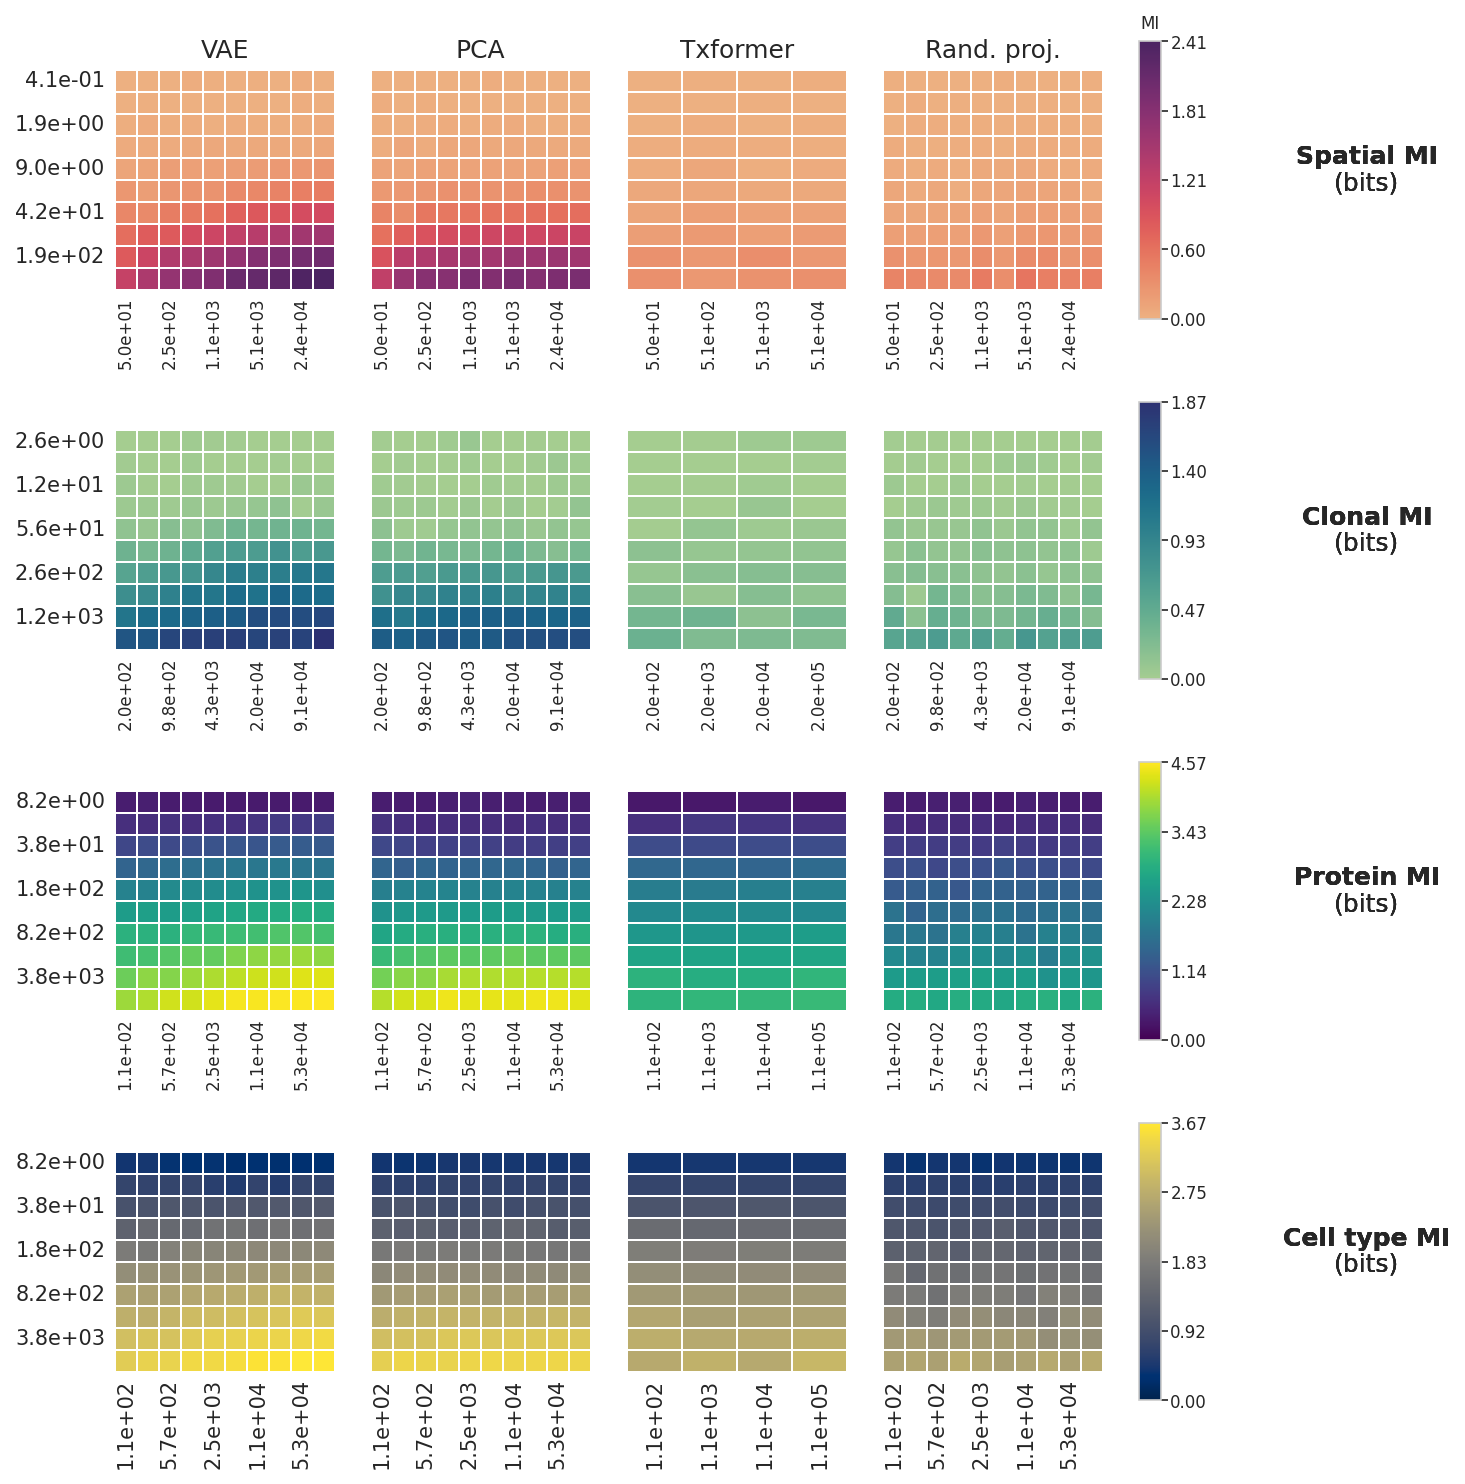

In [90]:
dfs = [merf_df, larry_df, cite_df, cite_df]
metrics = ['Spatial neighborhood MI', 'Clonal MI', 'Protein MI', 'Cell type fine MI']
names = ['Spatial MI', 'Clonal MI', 'Protein MI', 'Cell type MI']
palettes = ['flare', 'crest', 'viridis', 'cividis'] 


fig = plt.figure(figsize=(9, 12), dpi=dpi)
axes = fig.subplots(4,5, sharex=False, sharey='row', 
                    gridspec_kw = {'width_ratios':[1,1,1,1,0.1], 'wspace':0.2, 'hspace':0.3})

for i in range(4):
    df = dfs[i]
    metric = metrics[i]
    vmax = df[metric].max()

    for j in range(4):
        method = hue_order[j]

        sub_df = df[df['Method'] == method]

        sub_df = sub_df.pivot_table(index='UMI per cell', columns='Cell number', values=metrics[i])

        sub_df.index = ["%.1e"%f for f in sub_df.index]
        sub_df.columns = ["%.1e"%f for f in sub_df.columns]

        if j == 2:
            heatmap = sns.heatmap(sub_df, ax=axes[i, j], vmin=0, vmax=vmax, cmap=palettes[i], cbar=False, lw=.1)
            heatmap.set_aspect(0.4)
        else:
            sns.heatmap(sub_df, square=True, ax=axes[i, j], vmin=0, vmax=vmax, cmap=palettes[i], cbar=False,
                        xticklabels=2, yticklabels=2, lw=.1)
        
        if i != 3:
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90, fontsize=8)
        # if j != 0:
        #     axes[i, j].set_yticks([])

    color_norm = Normalize(vmin=0.0, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap=palettes[i], norm=color_norm)
    sm.set_array([])
    
    axes[0, i].set_title(hue_order[i])
    axes[i, -1].remove()
    # add the colorbar next to the last column of the row
    cbar_ax = fig.add_subplot(4, 5, 5+5*i)
    ticks = np.linspace(0, vmax, 5)
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=ticks, shrink=0.5, aspect=5, pad=0.1)
    cbar.ax.set_yticklabels([f"{t:.2f}" for t in ticks], fontsize=8)
    if i == 0:
        cbar.ax.set_title("MI", fontsize=8)

    for i, name in enumerate(['Spatial MI', 'Clonal MI', 'Protein MI', 'Cell type MI']):
        axes[i, 3].text(22, 4.5, name, va='bottom', ha='center', rotation='horizontal', fontsize=12, weight='bold')
        axes[i, 3].text(22, 4.5, '\n(bits)', va='center', ha='center', rotation='horizontal', fontsize=12)